## Homework Set 4

In [1]:
## MP 573 HW4
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal, ndimage, misc
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 20}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Problem 1.1: Gaussian vs  Bernoulli 

Suppose we have two independent random variables ($X$ and $Y$),  one of which ($X$) is Gaussian distributed with mean $\mu=0$ and standard deviation $\sigma=1$,  and the other ($Y$) is Bernoulli distributed with $p=0.5$.  What is the probability that $X>Y$? Please report your empirical and your theoretical results,  and show your work/logic for your theoretical results.  Do the empirical results agree with your theoretical calculation? 

In [2]:
# Number of trials
N = 100000;

# Distribution parameters (Bernoulli)
p = 0.5;

# Distribution parameters (Gaussian)
mu = 0
sigma = 1

# Generate some (pseudo-)random data
y = stats.bernoulli.rvs(p, size=N) # Bernoulli
x = stats.norm.rvs(mu, sigma, size=N)

# Count the number of instances where the Gaussian data were larger than the Bernoulli data
Ne = sum(x>y)

# Calculate the empirical fraction of experiments where the Gaussian (mean=0, std=1) was larger than the Bernoulli (p=0.5)
EmpProb = Ne/N
print('Empirical probability Gaussian > Bernoulli = ' + str(EmpProb))

Empirical probability Gaussian > Bernoulli = 0.32776


## Problem 1.2: Magnitude of Gaussian vs Bernoulli 

As before,  suppose we have two independent random variables ($X$ and $Y$),  one of which ($X$) is Gaussian distributed with mean $\mu=0$ and standard deviation $\sigma=1$,  and the other ($Y$) is Bernoulli distributed with $p=0.5$.  Now suppose we generate a third random variable $Z = |X|$ (i.e.,  $Z$ is the magnitude of our Gaussian random variable).   \emph{What is the probability that $Z>Y$?} Please report your empirical and your theoretical results,  and show your work/logic for your theoretical results.  Do the empirical results agree with your theoretical calculation? 



In [3]:
# Number of trials
N = 10000;

# Distribution parameters (Bernoulli)
p = 0.5;

# Distribution parameters (Gaussian)
mu = 0
sigma = 1

# Generate some (pseudo-)random data
y = stats.bernoulli.rvs(p, size=N) # Bernoulli
x = stats.norm.rvs(mu, sigma, size=N)
z = abs(x)

# Count the number of instances where the Gaussian data were larger than the Bernoulli data
Ne = sum(z>y)

# Calculate the empirical fraction of experiments where the Gaussian (mean=0, std=1) was larger than the Bernoulli (p=0.5)
EmpProb = Ne/N
print('Empirical probability magnitude of Gaussian > Bernoulli = ' + str(EmpProb))

Empirical probability magnitude of Gaussian > Bernoulli = 0.6639


## Problem 1.3: Effect of the number of trials

For the previous question (Magnitude of Gaussian vs Bernoulli), measure $N_e/N$ empirically as described above, using varying numbers of trials $N$. Specifically, use the following values of $N$: $20$, $10^3$, $10^5$. For each of these values of $N$, repeat the experiment at least 10 times, leading to at least 10 empirical measurements of $N_e/N$. For example, for $N=20$, you would run the code to generate random numbers following the distributions of $Y$ and $Z$ (20 each), leading to an estimate of $N_e/N$, and would repeat this process at least 10 times (leading to at least 10 different estimates of $N_e/N$) before moving on to the next value of $N$. For each value of $N$, report (or plot as a function of $N$), the empirical average of $N_e/N$ for that value of $N$, as well as the empirical standard deviation of $N_e/N$ for that value of $N$. If you plot the results, use  $\log(N)$ as you x axis, so that the results can be observed more easily. 

Describe (with words)  your observations of the behavior of the mean and standard deviation of $N_e/N$ as you increase $N$. 

Feel free to complete this problem manually by clicking run multiple times on the corresponding Jupyter notebook cell and writing down the results, or automatically by writing a loop that will automatically run this code multiple times and record the numbers for you. The second approach is recommended for reproducibility and minimization of manual work, but either approach is valid for this homework set. 


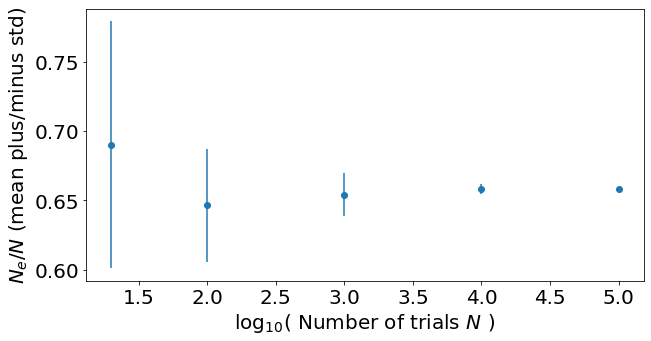

In [4]:
# To-do: 
# For a given value of N, obtain multiple (at least 10) empirical measurements 
# of Ne/N based on the code above
# And repeat this process for multiple values of N, in order to estimate the 
# mean and standard deviation of Ne/N as a function of N. 

# Numbers of trials (using a couple more here, to make the plot more intuitive)
Ns = [20,100, 1000,10000, 100000];

# Distribution parameters (Bernoulli)
p = 0.5;

# Distribution parameters (Gaussian)
mu = 0
sigma = 1

# Let's loop over repetitions and number of trials
Nrep = 20
AllProb = np.zeros((len(Ns),Nrep))
for k1 in range(len(Ns)):
    for k2 in range(Nrep):
       
        N = Ns[k1]
    
        # Generate some (pseudo-)random data
        y = stats.bernoulli.rvs(p, size=N) # Bernoulli
        x = stats.norm.rvs(mu, sigma, size=N)
        z = abs(x)

        # Count the number of instances where the Gaussian data were larger than the Bernoulli data
        Ne = sum(z>y)

        # Calculate the empirical fraction of experiments where the Gaussian (mean=0, std=1) was larger than the Bernoulli (p=0.5)
        EmpProb = Ne/N
        
        # Place EmpProp in an array so we can analyze once done with the loop
        AllProb[k1,k2] = EmpProb
        
        
MeanProb = np.mean(AllProb,1)
StdProb = np.std(AllProb,1)

# Display results
plt.figure(figsize=(10,5))
plt.rc('font', **font)
plt.errorbar(np.log10(Ns), MeanProb, StdProb, linestyle='none', marker='o')
plt.xlabel('log$_{10}$( Number of trials $N$ )')
plt.ylabel('$N_e/N$ (mean plus/minus std)');



## Problem 2.3: Sum of independent random variables 

### General case 

Suppose we have two independent random variables, $X$ and $Y$, with probability density functions $f_X(x)$ and $f_Y(x)$, respectively. Derive the probability density function of $f_Z(x)$ of $Z = X+Y$, in terms of $f_X(x)$ and $f_Y(x)$. 


### Sum of two uniform random variables

Suppose that both $X$ and $Y$ are uniformly distributed random variables between $a=-0.5$ and $b=0.5$. What is the distribution of $Z = X+Y$? 

### Computational confirmation (10 points)

Confirm your result from the previous subsection (sum of two uniform random variables) computationally. You may consider  using code similar to that provided at the end of the Jupyter notebook for lecture 20. If you want to show a histogram normalized as a probability density function (i.e., so it integrates to 1), you may consider using the hist function (as in lecture 20), adding the option 'density=True'. 




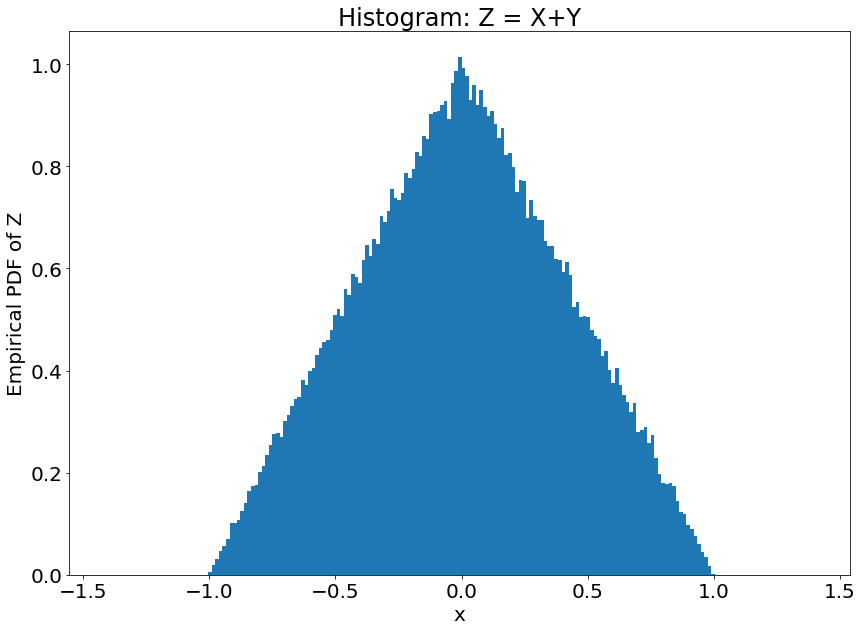

In [5]:
# To-do: Insert code here to generate data sampled from a random variable
# that is the sum of two independent, uniformly-distrbuted random variables. 
# You may want to check the code from lecture 20 for this purpose

# X and Y are uniformly distributed between -0.5 and +0.5
a = -0.5
b = 0.5

# Number of averages
Ave = 2

# Number of trials
N = 200000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

# Generate and show some data
xy = stats.uniform.rvs(a, b-a, size=[N,Ave])
z = np.sum(xy,axis=1)
plt.title('Histogram: Z = X+Y')
_ = plt.hist(z, bins=np.sqrt(Ave)*np.arange(a-0.5,b+0.5,0.01), density=True)
#plt.xlabel('Generated value x');
plt.ylabel('Empirical PDF of Z');
plt.xlabel('x');

## Problem 3.2: Linear transformation of Gaussian noise

### Theory 

Suppose we have a vector random variable $\mathbf{X}$ consisting of $M$ components $X_m$, each of which is an independent Gaussian random variable with mean $\mu=0$ and variance $\sigma^2=1$. Next, we generate a new random variable $\mathbf{Y}$ by linear transformation of $\mathbf{X}$, as $\mathbf{Y} = \mathbf{A X}$ where $\mathbf{A}$ is some $M \times M$ real-valued matrix. Note that this example is representative of noise propagation in imaging, as the noise propagates from the measurements to the reconstructed image. 

What is the covariance matrix of $\mathbf{X}$?

What are the mean vector and covariance matrix of $\mathbf{Y}$?




### Computational example

Now consider the specific case when $M=3$ (i.e., $\mathbf{X}$ has three i.i.d. components), and 
$$\mathbf{A} = \left(  \begin{array}{ccc}   1& 2& 3 \\ 2 & 1& 2 \\1 & 0 & 1 \end{array}    \right)$$

Calculate a large number (e.g., $N=10^5$) of vectors $\mathbf{x}$, distributed according to the probability distribution of $\mathbf{X}$, and generate the corresponding vectors $\mathbf{y} = \mathbf{A x}$. Calculate the empirical covariance matrix for $\mathbf{X}$ and $\mathbf{Y}$, and also calculate the theoretical covariance matrices for $\mathbf{X}$ and $\mathbf{Y}$. Compare the theoretical and empirical results. Please see the associated Jupyter notebook for some code to get started. 

In [98]:
# Generate a bunch of Gaussian iid 3x1 vectors (X)
N = 10000
mu = 0
sigma = 1
x = stats.norm.rvs(mu, sigma, size=[3,N])

# Generate some matrix A
A =  np.array([[1, 2, 3], [2, 1, 2], [1, 0, 1]])

# Generate our transformed random data Y=AX
y = np.matmul(A,x)

# Calculate means
mux = np.mean(x,axis=1)
muy = np.mean(y,axis=1)

# Calculate empirical covariance matrices for X and Y
Cx = np.cov(x)
Cy = np.cov(y)

# Theoretical covariance matrices for X and Y
# To-do by student: 
# Please replace the right-hand side of the following two lines, as appropriate
Cx_theory = np.identity(3)
Cy_theory = np.matmul(A,A.T)


print('\n Covariance matrix of X (empirical):')
print(str(Cx))

print('\n Covariance matrix of X (theoretical):')
print(str(Cx_theory))

print('\n Covariance matrix of Y (empirical):')
print(str(Cy))

print('\n Covariance matrix of Y (theoretical):')
print(str(Cy_theory))





 Covariance matrix of X (empirical):
[[ 1.    0.    0.02]
 [ 0.    1.01 -0.03]
 [ 0.02 -0.03  0.99]]

 Covariance matrix of X (theoretical):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

 Covariance matrix of Y (empirical):
[[13.76  9.94  4.  ]
 [ 9.94  9.02  4.03]
 [ 4.    4.03  2.03]]

 Covariance matrix of Y (theoretical):
[[14 10  4]
 [10  9  4]
 [ 4  4  2]]
